**not a knot approach to solve the cublic spline interpolation**

In [272]:
using Plots
using LinearAlgebra

In [273]:
data_points = [(-1, 0.038), (-0.8, 0.058), (-0.60, 0.10), (-0.4, 0.20),(-0.2,0.3)]
k = length(data_points)

5

In [274]:
x_points = [data_points[i][1] for i in 1:k]
y_points = [data_points[i][2] for i in 1:k]

5-element Vector{Float64}:
 0.038
 0.058
 0.1
 0.2
 0.3

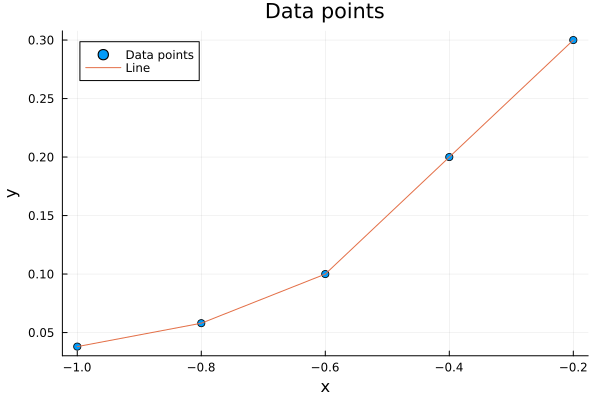

In [275]:
# plot the data points and the line
scatter(x_points, y_points, label="Data points", xlabel="x", ylabel="y", title="Data points")
plot!(x_points, y_points, label="Line")

In [276]:
# number of required cubic polynomials equations
number_of_equations_required(k) = k-3
# number of unknowns variables
number_of_unknows_variable(k) = 4*k # k is the number of cubic polynomials equations

number_of_unknows_variable (generic function with 1 method)

In [277]:
# number of cubic polynomials equations
number_of_equations = number_of_equations_required(k)
# number of unknowns variables
number_of_unknows = number_of_unknows_variable(number_of_equations)


8

In [278]:
# A matrix
A = zeros(number_of_unknows, number_of_unknows)
# b vector
b = zeros(number_of_unknows)

8-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [279]:
number_of_equations

2

In [280]:
# generate intervals for each cubic polynomial
# x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
# intervals (x1,x3),(x3,x4),(x4,x5),(x5,x6),(x6,x7),(x7,x8),(x8,x9),(x9,x11)

function generate_intervals_cubic_spline(data_points)
    intervals = []
    i = 1
    while i < length(data_points)
        if i==1
            push!(intervals, (data_points[i][1], data_points[i+2][1]))
            i+=2
        elseif i+2 == length(data_points)
            push!(intervals, (data_points[i][1], data_points[i+2][1]))
           break
        else
            push!(intervals, (data_points[i][1], data_points[i+1][1]))
            i+=1
        end
        
    end
    intervals
end



generate_intervals_cubic_spline (generic function with 1 method)

In [281]:
# fill the values of A and b of the cubic polynomials equations
# number_of_equations 
end_point = 3*number_of_equations
# create a intervals of the data points
intervals = generate_intervals_cubic_spline(data_points)

2-element Vector{Any}:
 (-1, -0.6)
 (-0.6, -0.2)

In [282]:
# polynomials equations
cublic_polynomial(x) = (a,b,c,d)->a+b*x+c*x^2+d*x^3

cublic_polynomial (generic function with 1 method)

In [283]:
function _first(A,b,i,index)
    t1 = data_points[index+1][1]    # First point of the i-th interval
    t2 = data_points[index+2][1]  # Second point of the i-th interval
    t3 = data_points[index+3][1]  # Third point of the i-th interval
    # first row of the i equation
    A[3*i-2, 4*i-3:4*i] = [1 t1 t1^2 t1^3]
    b[3*i-2] = data_points[index+1][2]
        # second row of the i equation
    A[3*i-1, 4*i-3:4*i] = [1 t2 t2^2 t2^3]
    b[3*i-1] = data_points[index+2][2]
        # third row of the i equation
    A[3*i, 4*i-3:4*i] = [1 t3 t3^2 t3^3]
    b[3*i] = data_points[index+3][2]
    return
end

function _last(A,b,i,index)
    t1 = data_points[index+1][1]    # First point of the i-th interval
    t2 = data_points[index+2][1]  # Second point of the i-th interval
    t3 = data_points[index+3][1]  # Third point of the i-th interval
    # first row of the i equation
    A[3*i-i, 4*i-3:4*i] = [1 t1 t1^2 t1^3]
    b[3*i-i] = data_points[index+1][2]
    # second row of the i equation
    A[3*i-(i-1), 4*i-3:4*i] = [1 t2 t2^2 t2^3]
    b[3*i-(i-1)] = data_points[index+2][2]
    # third row of the i equation
    A[3*i-(i-2), 4*i-3:4*i] = [1 t3 t3^2 t3^3]
    b[3*i-(i-2)] = data_points[index+3][2]
    return
end

function _inbetween(A,b,i,index)
    t1 = data_points[index][1]
    t2 = data_points[index+1][1]

    A[3*i-2, 4*i-3:4*i] = [1 t1 t1^2 t1^3]
    b[3*i-2] = data_points[index][2]
    A[3*i-1, 4*i-3:4*i] = [1 t2 t2^2 t2^3]
    b[3*i-1] = data_points[index+1][2]

end



function get_matrix_A_B(data_points, number_of_equations)
    k = length(data_points)
    number_of_unknowns  = 4*number_of_equations
    A = zeros(number_of_unknowns, number_of_unknowns)
    b = zeros(number_of_unknowns)
    # index of the data points 
    index = 1 
    for i in 1:number_of_equations
        if i==1
            _first(A,b,1,0)
            index+=2
        elseif i==number_of_equations
            _last(A,b,i,index-1)
            break
        else
            _inbetween(A,b,i,index)
           index+=1
        end
    end

    return A,b
end


get_matrix_A_B (generic function with 1 method)

In [284]:
# fill the values of A and b of the cubic polynomials equations

# Fill in the system with interpolation equations

A,b = get_matrix_A_B(data_points, number_of_equations)

([1.0 -1.0 … 0.0 0.0; 1.0 -0.8 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.038, 0.058, 0.1, 0.1, 0.2, 0.3, 0.0, 0.0])

In [285]:
number_of_equations

2

In [286]:
b

8-element Vector{Float64}:
 0.038
 0.058
 0.1
 0.1
 0.2
 0.3
 0.0
 0.0

In [287]:
# calculate the number of interior points
number_of_interior_points = number_of_equations-1

# extract the interior points
interior_point = [intervals[i][2] for i in 1:number_of_interior_points]

1-element Vector{Float64}:
 -0.6

In [288]:
# first derivative of the cubic polynomials 
#  b1 + 2c1x + 3d1x^2 - b2 - 2c2x - 3d2x^2 = 0
# second derivative of the cubic polynomials
# 2c1 + 6d1x - 2c2 - 6d2x = 0
function derivative_double_prime(A,b)
    index = 2*3+(number_of_equations-2)*2
    for i in 1:number_of_interior_points
        index+=1
        #1st derivative
        A[index, 1:8] = [0 1 2*interior_point[i] 3*interior_point[i]^2 0 -1 -2*interior_point[i] -3*interior_point[i]^2]
        index+=1
        #2nd derivative
        A[index, 1:8] = [0 0 2 6*interior_point[i] 0 0 -2 -6*interior_point[i]]
        
    end
end

derivative_double_prime (generic function with 1 method)

In [289]:
derivative_double_prime(A,b)

In [290]:
A

8×8 Matrix{Float64}:
 1.0  -1.0   1.0   -1.0    0.0   0.0   0.0    0.0
 1.0  -0.8   0.64  -0.512  0.0   0.0   0.0    0.0
 1.0  -0.6   0.36  -0.216  0.0   0.0   0.0    0.0
 0.0   0.0   0.0    0.0    1.0  -0.6   0.36  -0.216
 0.0   0.0   0.0    0.0    1.0  -0.4   0.16  -0.064
 0.0   0.0   0.0    0.0    1.0  -0.2   0.04  -0.008
 0.0   1.0  -1.2    1.08   0.0  -1.0   1.2   -1.08
 0.0   0.0   2.0   -3.6    0.0   0.0  -2.0    3.6

In [291]:
if det(A) == 0
    println("The determinant of A is zero")
end
x = A\b

8-element Vector{Float64}:
  0.9529999999999879
  2.92541666666661
  3.249999999999916
  1.2395833333332937
  0.3185000000000007
 -0.24708333333332638
 -2.0374999999999797
 -1.6979166666666485

In [292]:
# extract the cubic polynomials coefficients
cubic_polynomials = [(x[4*i-3], x[4*i-2], x[4*i-1], x[4*i]) for i in 1:number_of_equations]


2-element Vector{NTuple{4, Float64}}:
 (0.9529999999999879, 2.92541666666661, 3.249999999999916, 1.2395833333332937)
 (0.3185000000000007, -0.24708333333332638, -2.0374999999999797, -1.6979166666666485)

In [293]:
# get the index value for the polynomial equation

function get_index(x,intervals)
    for i in 1:length(intervals)
        if x >= intervals[i][1] && x <= intervals[i][2]
            return i
        end
    end
end

get_index (generic function with 1 method)

In [294]:
function cubic_polynomial_value(x, cubic_polynomials, intervals)
    index = get_index(x, intervals)
    if index == nothing
        return "The value of x is out of the range"
    end
    a,b,c,d = cubic_polynomials[index]
    return cublic_polynomial(x)(a,b,c,d)
end

cubic_polynomial_value (generic function with 1 method)

In [295]:
cubic_polynomial_value(-0.21, cubic_polynomials, intervals)

0.29625815624999996

In [296]:
# plot the cubic polynomials
using Plots
x_start = intervals[1][1]
x_end = intervals[end][2]
x_values = range(x_start, x_end, length=100)

y_values = [cubic_polynomial_value(x, cubic_polynomials, intervals) for x in x_values]



100-element Vector{Float64}:
 0.038000000000000034
 0.03913502813737457
 0.0402127625951727
 0.041237127936852414
 0.042212048725873474
 0.043141449525696096
 0.04402925489977805
 0.04487938941157932
 0.04569577762456012
 0.04648234410217822
 ⋮
 0.2726591109201047
 0.2764483147291024
 0.2801421005277755
 0.28373509265357033
 0.28722191544393355
 0.29059719323631167
 0.29385555036815114
 0.2969916111768984
 0.3

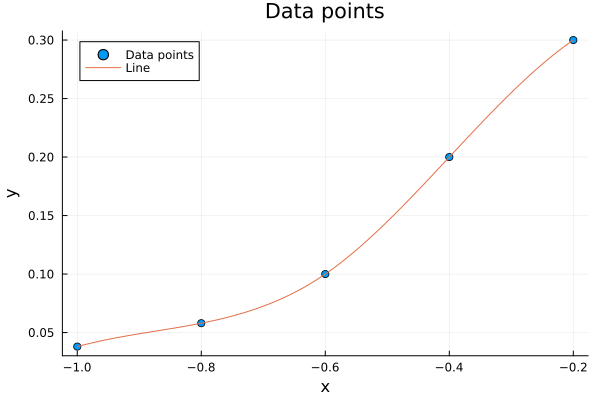

In [297]:
scatter(x_points, y_points, label="Data points", xlabel="x", ylabel="y", title="Data points")
plot!(x_values, y_values, label="Line")